# Movie Recommendation System Notebook 🍿🎬

## Purpose: Recommend movies based on user-preferred genres using cosine similarity

#### Import Libraries 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import NearestNeighbors
from collections import Counter

#### Load Dataset & Review it

In [9]:
movies = pd.read_csv('movies.csv')
movies.head()

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski
2,2,245000000,Action Adventure Crime,http://www.sonypictures.com/movies/spectre/,206647,spy based on novel secret agent sequel mi6,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Daniel Craig Christoph Waltz L\u00e9a Seydoux ...,"[{'name': 'Thomas Newman', 'gender': 2, 'depar...",Sam Mendes
3,3,250000000,Action Crime Drama Thriller,http://www.thedarkknightrises.com/,49026,dc comics crime fighter terrorist secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,Christian Bale Michael Caine Gary Oldman Anne ...,"[{'name': 'Hans Zimmer', 'gender': 2, 'departm...",Christopher Nolan
4,4,260000000,Action Adventure Science Fiction,http://movies.disney.com/john-carter,49529,based on novel mars medallion space travel pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,Taylor Kitsch Lynn Collins Samantha Morton Wil...,"[{'name': 'Andrew Stanton', 'gender': 2, 'depa...",Andrew Stanton


In [10]:
movies.shape

(4803, 24)

#### Select relevant features for recommendation

In [11]:
movies = movies[['title', 'genres', 'vote_average', 'vote_count']]
print("Selected features: ")
movies.head()

Selected features: 


,title,genres,vote_average,vote_count
0,Avatar,Action Adventure Fantasy Science Fiction,7.2,11800
1,Pirates of the Caribbean: At World's End,Adventure Fantasy Action,6.9,4500
2,Spectre,Action Adventure Crime,6.3,4466
3,The Dark Knight Rises,Action Crime Drama Thriller,7.6,9106
4,John Carter,Action Adventure Science Fiction,6.1,2124


#### Checking for null values & Handle them

In [12]:
print("Checking for missing values: ")
movies.isnull().sum()

Checking for missing values: 


title            0
genres          28
vote_average     0
vote_count       0
dtype: int64

We can notice genres attribute contain 28 null values so WE MUST handle them 

movies['genres'] = movies['genres'].fillna('')  # fill missing genres with empty string

Now we check again if there is still any missing values

In [13]:
movies['genres'].isnull().sum() 

28

#### Converting Categroical values to Numerical values

based on our selected features, 'genres' is the only attribute that contain categorical values so we need to convert them

In [15]:
# Convert values from string to list
movies['genres'] = movies['genres'].fillna('')
# convert string to list
movies['genres_list'] = movies['genres'].apply(lambda x: x.split())

In [16]:
# Convert genres into numerical columns USING One-Hot encode genres
multLb = MultiLabelBinarizer()
genre_matrix = multLb.fit_transform(movies['genres_list'])

#### Training our model using KNN 

In [17]:
knn_model = NearestNeighbors(
    n_neighbors=10,
    metric='cosine'
)
knn_model.fit(genre_matrix)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [18]:
print("Available genres:")
print(list(multLb.classes_))

Available genres:
['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Fiction', 'Foreign', 'History', 'Horror', 'Movie', 'Music', 'Mystery', 'Romance', 'Science', 'TV', 'Thriller', 'War', 'Western']


#### Taking user input for perferred genres of a movie

In [19]:
user_input = input("Enter genre of a movie (separated space for multiple genres): ")
user_genres = user_input.split()

Enter genre of a movie (separated space for multiple genres):  Action Comedy


#### Create a user preference vector

In [20]:
user_vector = pd.Series(0, index=multLb.classes_)
for genre in user_genres:
    if genre in user_vector.index:
        user_vector[genre] = 1

#### Prediction

In [21]:
distances, indices = knn_model.kneighbors([user_vector])

#### Recommend movies 

In [22]:
recommended_movies = movies.iloc[indices[0]].copy()
recommended_movies['similarity'] = 1 - distances[0]

In [23]:
recommended_movies = recommended_movies.sort_values(
    by=['similarity', 'vote_average'],
    ascending=False)

#### Sort by similarity and rating


In [24]:
recommended_movies[['title', 'genres', 'vote_average']].head(10)

,title,genres,vote_average
3099,Shaolin Soccer,Action Comedy,6.6
3500,Lucky Break,Action Comedy,6.5
2001,The Crew,Action Comedy,6.4
914,Central Intelligence,Action Comedy,6.2
3029,Kung Pow: Enter the Fist,Action Comedy,6.1
1830,Ride Along,Action Comedy,6.1
1174,Ride Along 2,Action Comedy,6.1
227,Knight and Day,Action Comedy,5.9
394,Tower Heist,Action Comedy,5.8
1933,Underclassman,Action Comedy,5.5


#### Testing

In [25]:
test_inputs = ["Action Adventure", "Comedy Romance", "Horror Crime"]
for test in test_inputs:
    user_vector[:] = 0
    for g in test.split():
        if g in user_vector.index:
            user_vector[g] = 1

    distances, indices = knn_model.kneighbors([user_vector])
    print(f"\nInput Genres: {test}")
    print(movies.iloc[indices[0]][['title', 'genres']].head(5))


Input Genres: Action Adventure
                                                  title            genres
4316                             Cotton Comes to Harlem  Action Adventure
469                                 The Legend of Zorro  Action Adventure
640                                   The Mask of Zorro  Action Adventure
53    Indiana Jones and the Kingdom of the Crystal S...  Adventure Action
75                                           Waterworld  Adventure Action

Input Genres: Comedy Romance
                              title          genres
1975  Win a Date with Tad Hamilton!  Comedy Romance
3097                     Swept Away  Comedy Romance
4537                   Johnny Suede  Comedy Romance
3687                    Without Men  Comedy Romance
1934                Say It Isn't So  Comedy Romance

Input Genres: Horror Crime
                       title                 genres
4735       The Night Visitor           Crime Horror
2413  Saw: The Final Chapter           Horror Crim

#### Visualization Similarity Bar Chart 

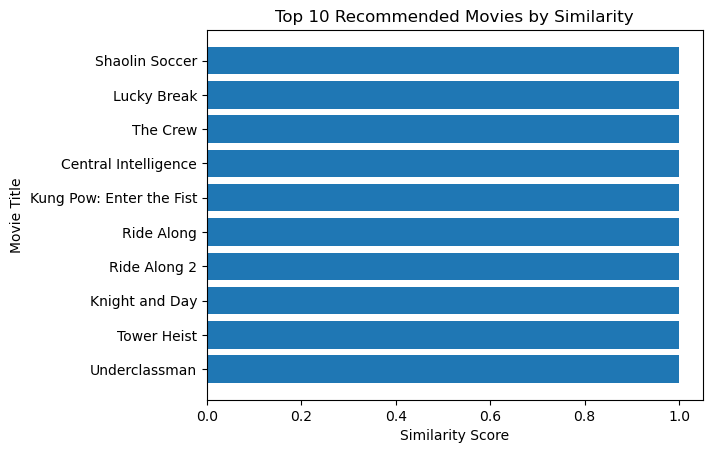

In [26]:
top_movies = recommended_movies.head(10)
plt.figure()
plt.barh(top_movies['title'], top_movies['similarity'])
plt.xlabel("Similarity Score")
plt.ylabel("Movie Title")
plt.title("Top 10 Recommended Movies by Similarity")
plt.gca().invert_yaxis()
plt.show()